# Importing Required Libraries and Modules

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
print("The shape of the dataset is",df.shape)

The shape of the dataset is (918, 12)


# Data Frame Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
print(df.isnull().sum())
print("No Null Values in Dataset")

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
No Null Values in Dataset


In [7]:
print("No Duplicate Values in Dataset")
df.duplicated().sum()

No Duplicate Values in Dataset


0

# Encoding the categorical values by LabelEncoder

In [8]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
Sex = {index : label for index, label in enumerate(encoder.classes_)}
Sex

{0: 'F', 1: 'M'}

In [9]:
df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])
ChestPainType = {index : label for index, label in enumerate(encoder.classes_)}
ChestPainType

{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}

In [10]:
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])
RestingECG = {index : label for index, label in enumerate(encoder.classes_)}
RestingECG

{0: 'LVH', 1: 'Normal', 2: 'ST'}

In [11]:
df['ExerciseAngina'] = encoder.fit_transform(df['ExerciseAngina'])
ExerciseAngina = {index : label for index, label in enumerate(encoder.classes_)}
ExerciseAngina

{0: 'N', 1: 'Y'}

In [12]:
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])
ST_Slope = {index : label for index, label in enumerate(encoder.classes_)}
ST_Slope

{0: 'Down', 1: 'Flat', 2: 'Up'}

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [14]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [15]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


# Univariate Analysis

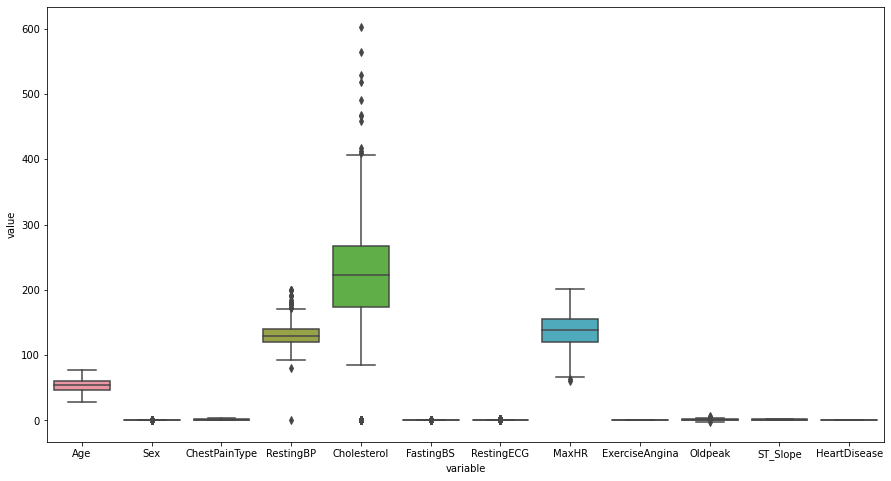

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [ ]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [ ]:
X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']

# Features Extraction by using SelectKBest

In [ ]:
best_features = SelectKBest(score_func= f_regression, k=5)
fit = best_features.fit(X,Y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']

In [ ]:
featureScores

In [ ]:
# Choosing top 6 score features for prediction
print(featureScores.nlargest(6,'Score'))

In [ ]:
X = X.drop(["RestingBP","Cholesterol","FastingBS","RestingECG"],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

# Prediction With Hyperparameter Tuning by using GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier()
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]}
grid_search = GridSearchCV(estimator =dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = 3)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.recall_score(y_test,y_pred)
print("The Accuracy is",accuracy*100)
print("The confusion metrics is\n",cm)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [ ]:
rfc = RandomForestClassifier()
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator =rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(bootstrap = False,
 max_depth = 4,
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split= 5,
 n_estimators = 48)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.recall_score(y_test,y_pred)
print("The Accuracy is",accuracy*100)
print("The confusion metrics is\n",cm)

In [ ]:
svm = SVC()
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator =svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
svm = SVC(kernel='linear',C=1000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.recall_score(y_test,y_pred)
print("The Accuracy is",accuracy*100)
print("The confusion metrics is\n",cm)

In [ ]:
knn = KNeighborsClassifier()
parameters = {
    "n_neighbors":[2,4,5,0,None],
    "weights":['uniform','distance'],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size":[10,30,40],
    "p":[2,3,4],
    "metric":['minkowski'],
    "metric_params":[1,2,3,None],
    "n_jobs":[1,2,3,None],
}
grid_search = GridSearchCV(estimator =knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
knn = KNeighborsClassifier( algorithm = 'auto',
 leaf_size = 30,
 metric= 'minkowski',
 metric_params= None,
 n_jobs= 1,
 n_neighbors= 5,
 p= 2,
 weights= 'distance')
knn.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.recall_score(y_test,y_pred)
print("The Accuracy is",accuracy*100)
print("The confusion metrics is\n",cm)